## Imports + Setup

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

import sys

sys.path.append("../")

import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cortex

Set random seed:

In [10]:
seed = 0

## Inspect NSD fMRI data

Load dataset

In [3]:
sys.path.append("../neurometry/rep_metrics/")

from benchmarks import NSDBenchmark

target_regions = ["EVC", "OTC"]

combined_response_data = []
combined_metadata = []


for region in target_regions:
    benchmark = NSDBenchmark(*f"shared1000_{region}-only".split("_"))

    response_data = benchmark.response_data.copy()
    voxel_metadata = benchmark.metadata.copy()

    combined_response_data.append(response_data)
    combined_metadata.append(voxel_metadata)

response_data = pd.concat(combined_response_data).drop_duplicates()
voxel_metadata = pd.concat(combined_metadata).drop_duplicates()
stimulus_data = benchmark.stimulus_data

functional_rois = benchmark.functional_rois

Now loading the shared1000 image set and the EVC-only voxel set...
Now loading the shared1000 image set and the OTC-only voxel set...


### Stimulus image information

There are 1000 stimulus images
Image description: f["A brown dog with a smile on it's face standing on a dirty ground.", 'A dog happily sitting in the sand tail wagging', 'a dog sitting up looking into a camera', 'A dog sitting in the grass looking up.', 'A dog smiling looking up at the camera.']


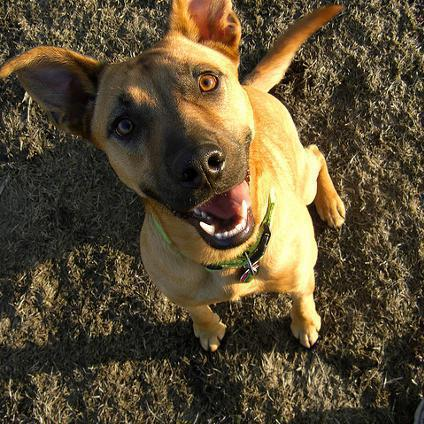

In [18]:
print(f"There are {stimulus_data.shape[0]} stimulus images")

stimulus_id = 797

print(f"Image description: f{stimulus_data.loc[stimulus_id]['coco_captions']}")
benchmark.get_stimulus(stimulus_id)

### fMRI voxel metadata

In [20]:
voxel_metadata

subj_id     ncsnr  EVC  early  ventral  midventral  lateral  \
voxel_id                                                                   
S1-22-11-34        1  0.248737  1.0      0        0           1        0   
S1-22-11-35        1  0.159338  1.0      0        0           1        0   
S1-22-12-33        1  0.145336  1.0      0        0           1        0   
S1-23-10-33        1  0.054892  1.0      0        0           1        0   
S1-23-10-34        1  0.172727  1.0      0        0           1        0   
...              ...       ...  ...    ...      ...         ...      ...   
S7-69-32-38        7  0.372039  NaN      0        0           0        1   
S7-69-33-38        7  0.311678  NaN      0        0           0        1   
S7-70-30-35        7  0.207324  NaN      0        0           0        1   
S7-70-30-39        7  0.206969  NaN      0        0           0        1   
S7-70-31-38        7  0.344555  NaN      0        0           0        1   

             midlateral  parietal  midparietal  ...  FFA-2  OFA  EBA  FBA-1  \
voxel_id                                        ...                           
S1-22-11-34           0         0            0  ...    NaN  NaN  NaN    NaN   
S1-22-11-35           0         0            0  ...    NaN  NaN  NaN    NaN   
S1-22-12-33           0         0            0  ...    NaN  NaN  NaN    NaN   
S1-23-10-33           0         0            0  ...    NaN  NaN  NaN    NaN   
S1-23-10-34           0         0            0  ...    NaN  NaN  NaN    NaN   
...                 ...       ...          ...  ...    ...  ...  ...    ...   
S7-69-32-38           0         0            0  ...    0.0  0.0  1.0    0.0   
S7-69-33-38           0         0            0  ...    0.0  0.0  1.0    0.0   
S7-70-30-35           0         0            0  ...    0.0  0.0  1.0    0.0   
S7-70-30-39           0         0            0  ...    0.0  0.0  1.0    0.0   
S7-70-31-38           0         0            0  ...    0.0  0.0  1.0    0.0   

             FBA-2  OPA  PPA  VWFA-1  VWFA-2  OWFA  
voxel_id                                            
S1-22-11-34    NaN  NaN  NaN     NaN     NaN   NaN  
S1-22-11-35    NaN  NaN  NaN     NaN     NaN   NaN  
S1-22-12-33    NaN  NaN  NaN     NaN     NaN   NaN  
S1-23-10-33    NaN  NaN  NaN     NaN     NaN   NaN  
S1-23-10-34    NaN  NaN  NaN     NaN     NaN   NaN  
...            ...  ...  ...     ...     ...   ...  
S7-69-32-38    0.0  0.0  0.0     0.0     0.0   0.0  
S7-69-33-38    0.0  0.0  0.0     0.0     0.0   0.0  
S7-70-30-35    0.0  0.0  0.0     0.0     0.0   0.0  
S7-70-30-39    0.0  0.0  0.0     0.0     0.0   0.0  
S7-70-31-38    0.0  0.0  0.0     0.0     0.0   0.0  

[44746 rows x 29 columns]

### fMRI response data

In [21]:
print(
    f"There are {response_data.shape[0]} voxels recorded on {response_data.shape[1]} stimulus images"
)
response_data.head()

There are 42384 voxels recorded on 1000 stimulus images


584       605       625       650      1308      1625  \
voxel_id                                                                  
S1-22-11-34  0.752486 -0.297966 -0.108485  0.027122  0.574349 -0.922022   
S1-22-11-35 -0.103754  0.244961  0.504785 -0.929686 -1.126533 -0.101796   
S1-22-12-33 -0.569562  0.082608  0.327680  0.350439 -0.775774 -0.040204   
S1-23-10-33  0.802062  0.366396 -0.060212  0.717037 -0.578445  0.318957   
S1-23-10-34  0.267148 -0.457386  1.764591 -0.621412  0.296390 -0.758162   

                 1877      2270      2349      2372  ...    575701    575971  \
voxel_id                                             ...                       
S1-22-11-34  0.244273 -0.129998 -0.156549 -0.097647  ...  0.811811  0.334647   
S1-22-11-35 -0.451838 -1.169137 -0.005067  0.310044  ...  1.485696  0.213420   
S1-22-12-33 -0.336788 -0.033517  0.059881  0.033386  ... -0.042141  0.052800   
S1-23-10-33  0.177282 -0.390726  0.566761  0.003886  ... -0.649402 -0.205219   
S1-23-10-34 -0.369534 -0.403290 -0.816647 -0.263991  ...  1.237165  0.443143   

               576011    576749    576789    577817    577964    578169  \
voxel_id                                                                  
S1-22-11-34  0.576700 -0.051925  0.960291  1.350665  0.745355 -0.587113   
S1-22-11-35  1.042587 -0.898903 -0.055290  0.927589  0.634646  0.320112   
S1-22-12-33  0.480060  0.420772  0.358667  0.415686  0.425214  0.281323   
S1-23-10-33 -0.324081  0.658013  0.643523  0.038668  0.335630 -0.877173   
S1-23-10-34  1.142742 -0.467000  0.029254  0.263533  0.857254  0.607774   

               579906    580813  
voxel_id                         
S1-22-11-34 -1.248250 -0.684790  
S1-22-11-35  0.194043 -1.279413  
S1-22-12-33 -0.422511 -0.626106  
S1-23-10-33 -1.218459 -0.321058  
S1-23-10-34 -0.189726 -1.609570  

[5 rows x 1000 columns]

### Organize fMRI voxel responses based on subject & functional region in dict 'neural_data':

get subject ids

In [18]:
subject_ids = voxel_metadata["subj_id"].unique()
print(subject_ids)

[1 2 5 7]


In [19]:
neural_data = {}
for subject_id in subject_ids:
    subject_neural_data = {}
    subject_dataframe = voxel_metadata[voxel_metadata["subj_id"] == subject_id]
    for region in functional_rois:
        region_voxel_idxs = subject_dataframe[subject_dataframe[region] == True].index
        subject_neural_data[region] = response_data.loc[region_voxel_idxs]
        print(
            f"Subject {subject_id} has {len(subject_neural_data[region])} voxels in region {region}"
        )
    neural_data[subject_id] = subject_neural_data

Subject 1 has 594 voxels in region V1v
Subject 1 has 756 voxels in region V1d
Subject 1 has 832 voxels in region V2v
Subject 1 has 598 voxels in region V2d
Subject 1 has 646 voxels in region V3v
Subject 1 has 540 voxels in region V3d
Subject 1 has 684 voxels in region hV4
Subject 1 has 418 voxels in region FFA-1
Subject 1 has 211 voxels in region FFA-2
Subject 1 has 269 voxels in region OFA
Subject 1 has 2525 voxels in region EBA
Subject 1 has 333 voxels in region FBA-1
Subject 1 has 313 voxels in region FBA-2
Subject 1 has 1173 voxels in region OPA
Subject 1 has 734 voxels in region PPA
Subject 1 has 662 voxels in region VWFA-1
Subject 1 has 355 voxels in region VWFA-2
Subject 1 has 359 voxels in region OWFA
Subject 2 has 543 voxels in region V1v
Subject 2 has 555 voxels in region V1d
Subject 2 has 610 voxels in region V2v
Subject 2 has 450 voxels in region V2d
Subject 2 has 563 voxels in region V3v
Subject 2 has 529 voxels in region V3d
Subject 2 has 482 voxels in region hV4
Subject 

### Visualize activity on cortex

In [174]:
import nibabel as nib

nsd_path = "/scratch/facosta/NSD"


def get_subj_dims(subj):
    fn = f"{nsd_path}/nsddata/ppdata/{subj}/func1pt8mm/mean.nii.gz"
    return nib.load(fn).get_fdata().shape


subj = "subj01"
space = "func1pt8mm"
xfm = "func1pt8_to_anat0pt8_autoFSbbr"
beta_version = "betas_fithrf_GLMdenoise_RR"

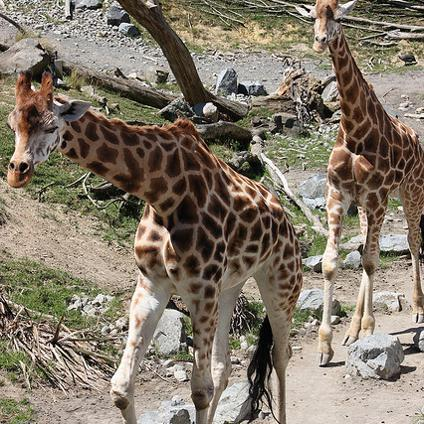

In [194]:
stimulus_id = 59
subject_id = 1
image_id = str(stimulus_data.loc[stimulus_id]["image_id"])

volumetric_data = np.zeros(get_subj_dims(subj))
volumetric_data[:] = np.nan


for region in functional_rois:
    response = neural_data[subject_id][region]
    for row_i, row in response.iterrows():
        _, x, y, z = row_i.split("-")
        x, y, z = int(x), int(y), int(z)
        volumetric_data[x, y, z] = response.loc[row_i][image_id]


voxel_data = volumetric_data

benchmark.get_stimulus(stimulus_id)

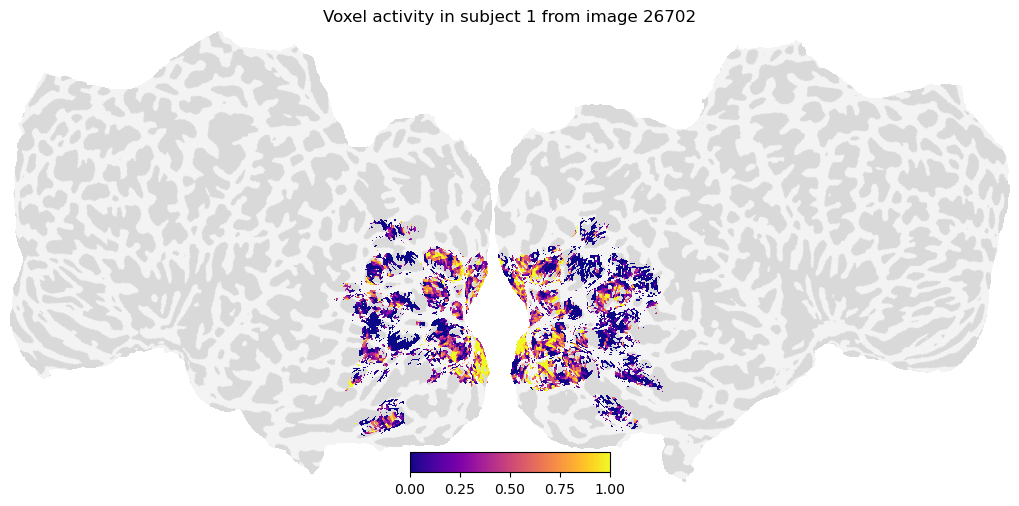

In [196]:
import neurometry.rep_metrics.viz as viz

# Generate the plot_data and fig using plot_ROI_flatmap function
volume, fig = viz.plot_ROI_flatmap(
    voxel_data,
    subj,
    figsize=(10, 5),
    cmap="plasma",
    vmin=0,
    vmax=1.0,  # rois = True,
    title=f"Voxel activity in subject {subject_id} from image {image_id}",
)

brain_plot = viz.convert_figure_to_image(fig)

/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

<Axes: xlabel='Test', ylabel='Score'>

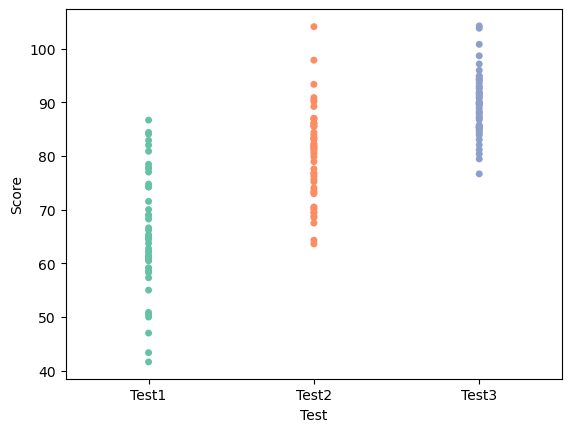

In [6]:
import seaborn as sns
import pandas as pd
import random

# Sample data
tests = ['Test1', 'Test2', 'Test3']
scores = [random.gauss(70, 10) for _ in range(50)] + \
         [random.gauss(80, 8) for _ in range(50)] + \
         [random.gauss(90, 5) for _ in range(50)]
test_labels = ['Test1']*50 + ['Test2']*50 + ['Test3']*50

# Create a DataFrame
df = pd.DataFrame({
    'Test': test_labels,
    'Score': scores
})

# Create the strip plot
sns.stripplot(x='Test', y='Score', data=df, jitter=False, palette="Set2")

# Create the swarm plot
#sns.swarmplot(x='Test', y='Score', data=df, palette="Set2")

## Anatomical Geometry of Visual Cortex

In [28]:
import neurometry.rep_metrics.anatomy as anatomy
import neurometry.rep_metrics.viz as viz

In [25]:
subjects = ["subj01", "subj02", "subj05", "subj07"]

subject_rois = anatomy.get_subjects_rois(subjects)

/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/cortex/svgoverlay.py:499: UserWarning: Requested layer in svg file (floc-places) contains no splines
  warnings.warn("Requested layer in svg file (%s) contains no splines"%self.name)
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/cortex/svgoverlay.py:499: UserWarning: Requested layer in svg file (floc-faces) contains no splines
  warnings.warn("Requested layer in svg file (%s) contains no splines"%self.name)
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/cortex/svgoverlay.py:499: UserWarning: Requested layer in svg file (floc-bodies) contains no splines
  warnings.warn("Requested layer in svg file (%s) contains no splines"%self.name)
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/cortex/svgoverlay.py:499: UserWarning: Requested layer in svg file (prf-visualrois) contains no splines
  warnings.warn("Requested layer in svg file (%s) contains no splines"%s

In [26]:
subject = "subj02"
rois = anatomy.get_roi_list_intersection(functional_rois, subject_rois[subject])

surfs = [cortex.polyutils.Surface(*d) for d in cortex.db.get_surf(subject, "fiducial")]

left, right = surfs

### Visualize Fréchet means & distances between PPA and EBA

/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Background RRGGBBAA: ffffff00
Area 0:0:2349.34:1024 exported to 2349 x 1024 pixels (96 dpi)


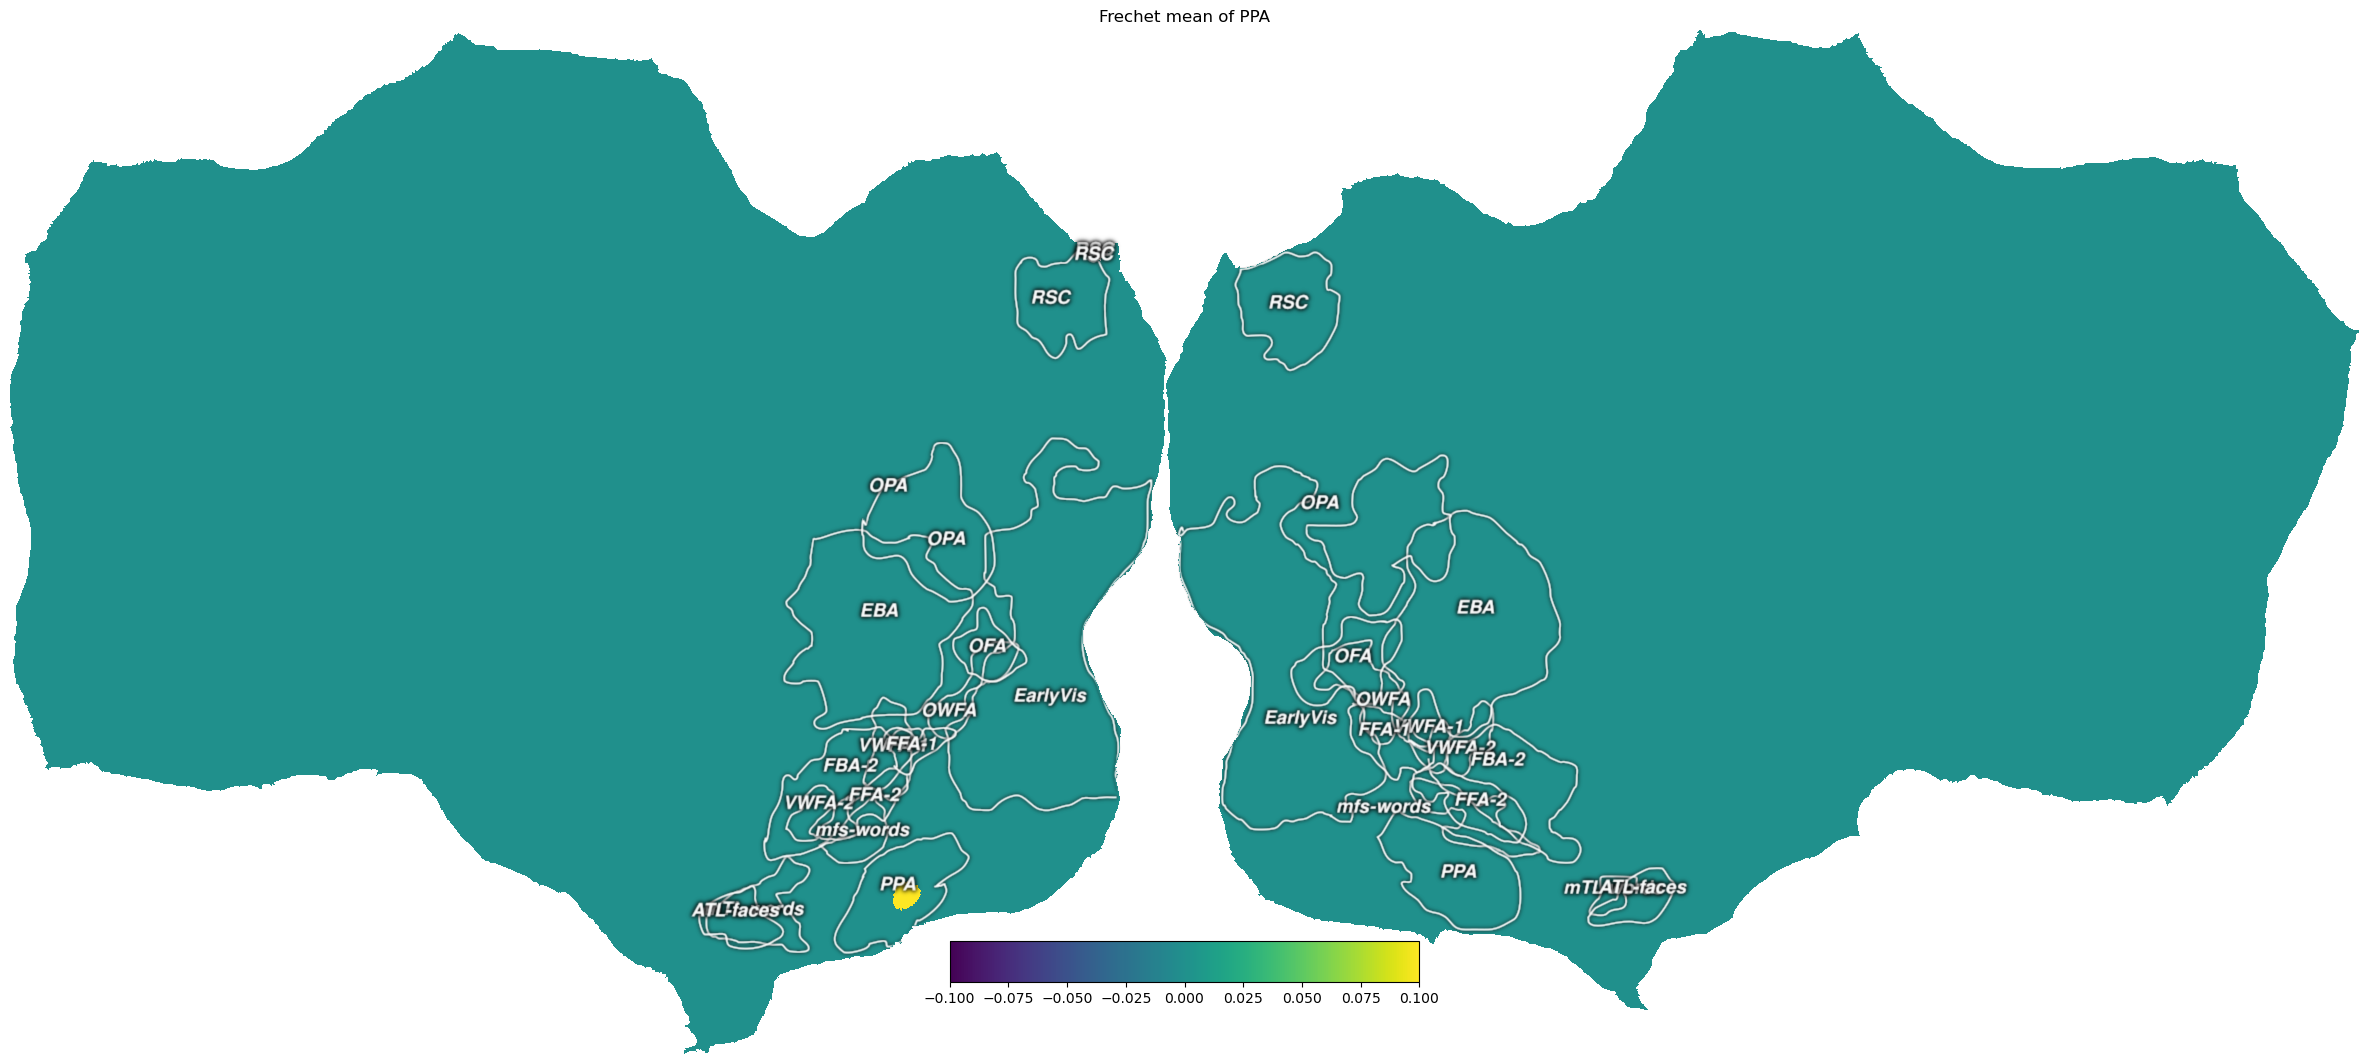

In [30]:
roi = "PPA"

vertex_mask = cortex.get_roi_verts(subject, roi=roi, mask=True)
left_roi_surface = left.create_subsurface(vertex_mask=vertex_mask[roi])
frechet_mean_id = anatomy.compute_frechet_mean(left_roi_surface)
roi_pts_ids = cortex.get_roi_verts(subject, roi=roi)[roi]
PPA_frechet_mean_id_left = anatomy._ids_from_roi_to_hemi(roi_pts_ids, frechet_mean_id)

viz.plot_roi_frechet_mean(subject, left, roi, PPA_frechet_mean_id_left)

/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Background RRGGBBAA: ffffff00
Area 0:0:2349.34:1024 exported to 2349 x 1024 pixels (96 dpi)


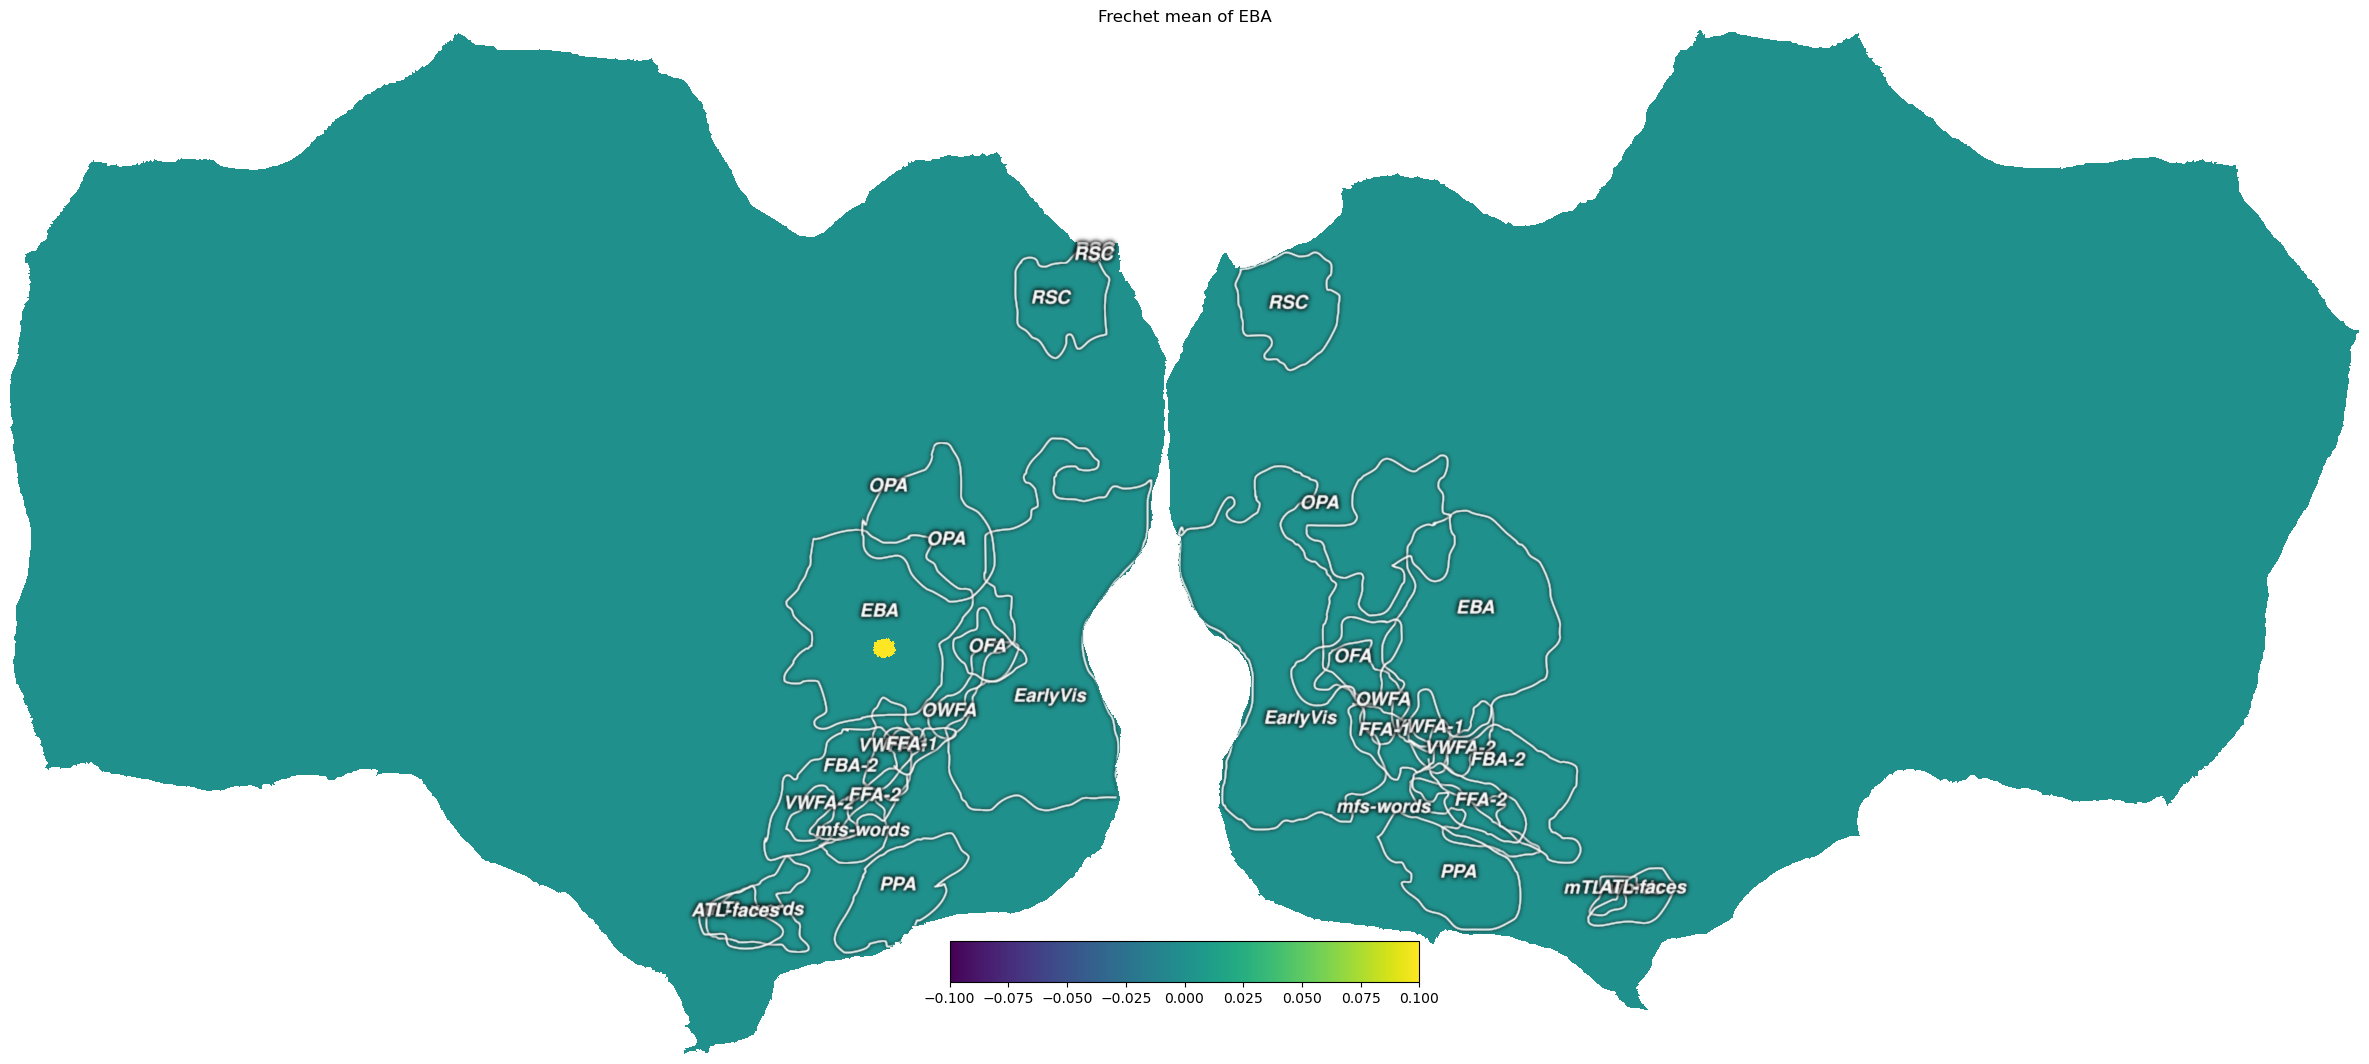

In [31]:
roi = "EBA"

vertex_mask = cortex.get_roi_verts(subject, roi=roi, mask=True)
left_roi_surface = left.create_subsurface(vertex_mask=vertex_mask[roi])
frechet_mean_id = anatomy.compute_frechet_mean(left_roi_surface)
roi_pts_ids = cortex.get_roi_verts(subject, roi=roi)[roi]
EBA_frechet_mean_id_left = anatomy._ids_from_roi_to_hemi(roi_pts_ids, frechet_mean_id)


viz.plot_roi_frechet_mean(subject, left, roi, EBA_frechet_mean_id_left)

/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Background RRGGBBAA: ffffff00
Area 0:0:2349.34:1024 exported to 2349 x 1024 pixels (96 dpi)


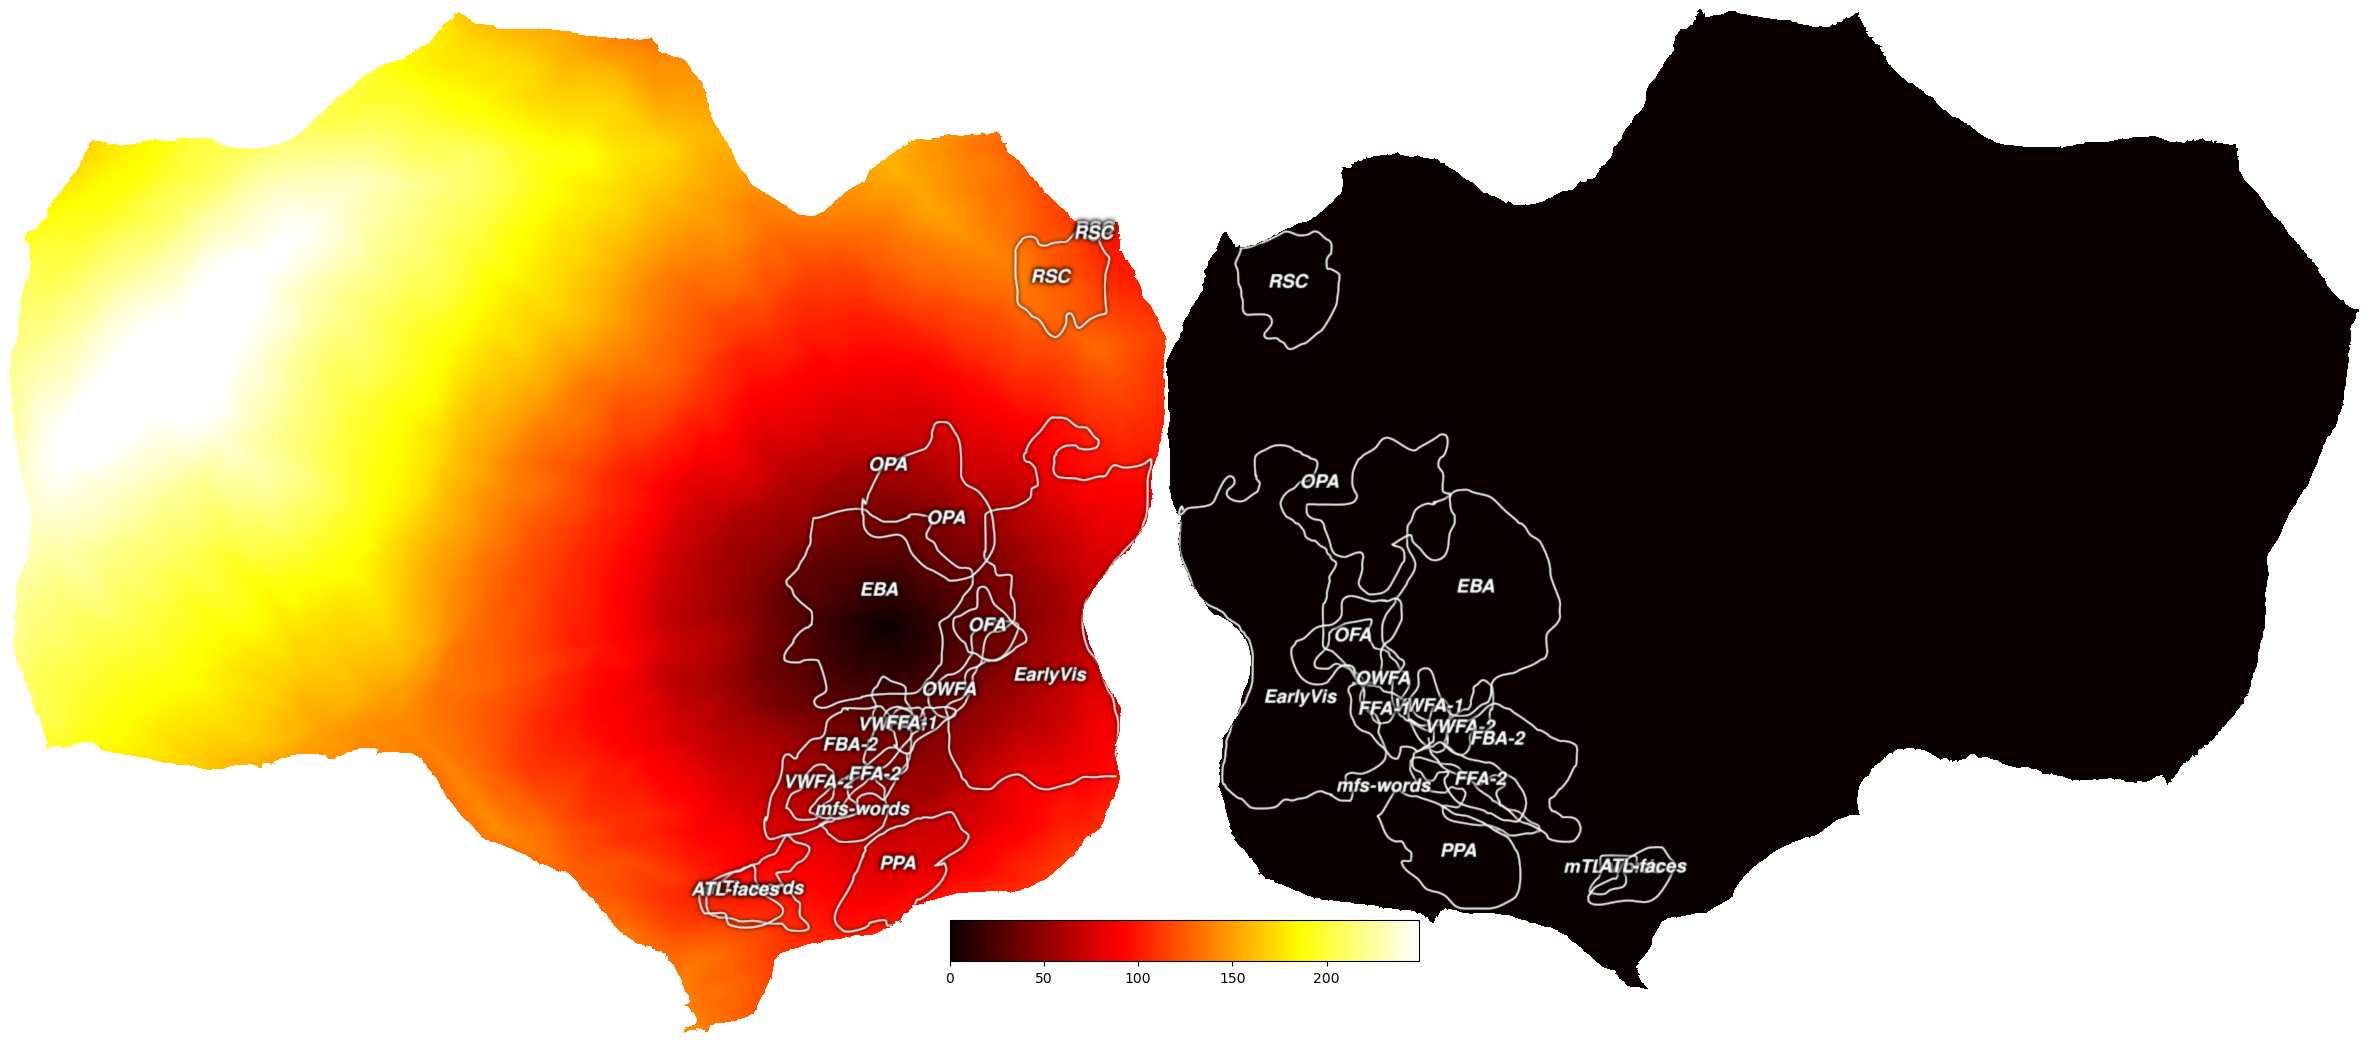

In [32]:
EBA_dists = left.geodesic_distance([EBA_frechet_mean_id_left])
dist_map = cortex.Vertex(EBA_dists, subject, cmap="hot")
cortex.quickshow(dist_map)
plt.show()

Background RRGGBBAA: ffffff00
Area 0:0:2349.34:1024 exported to 2349 x 1024 pixels (96 dpi)


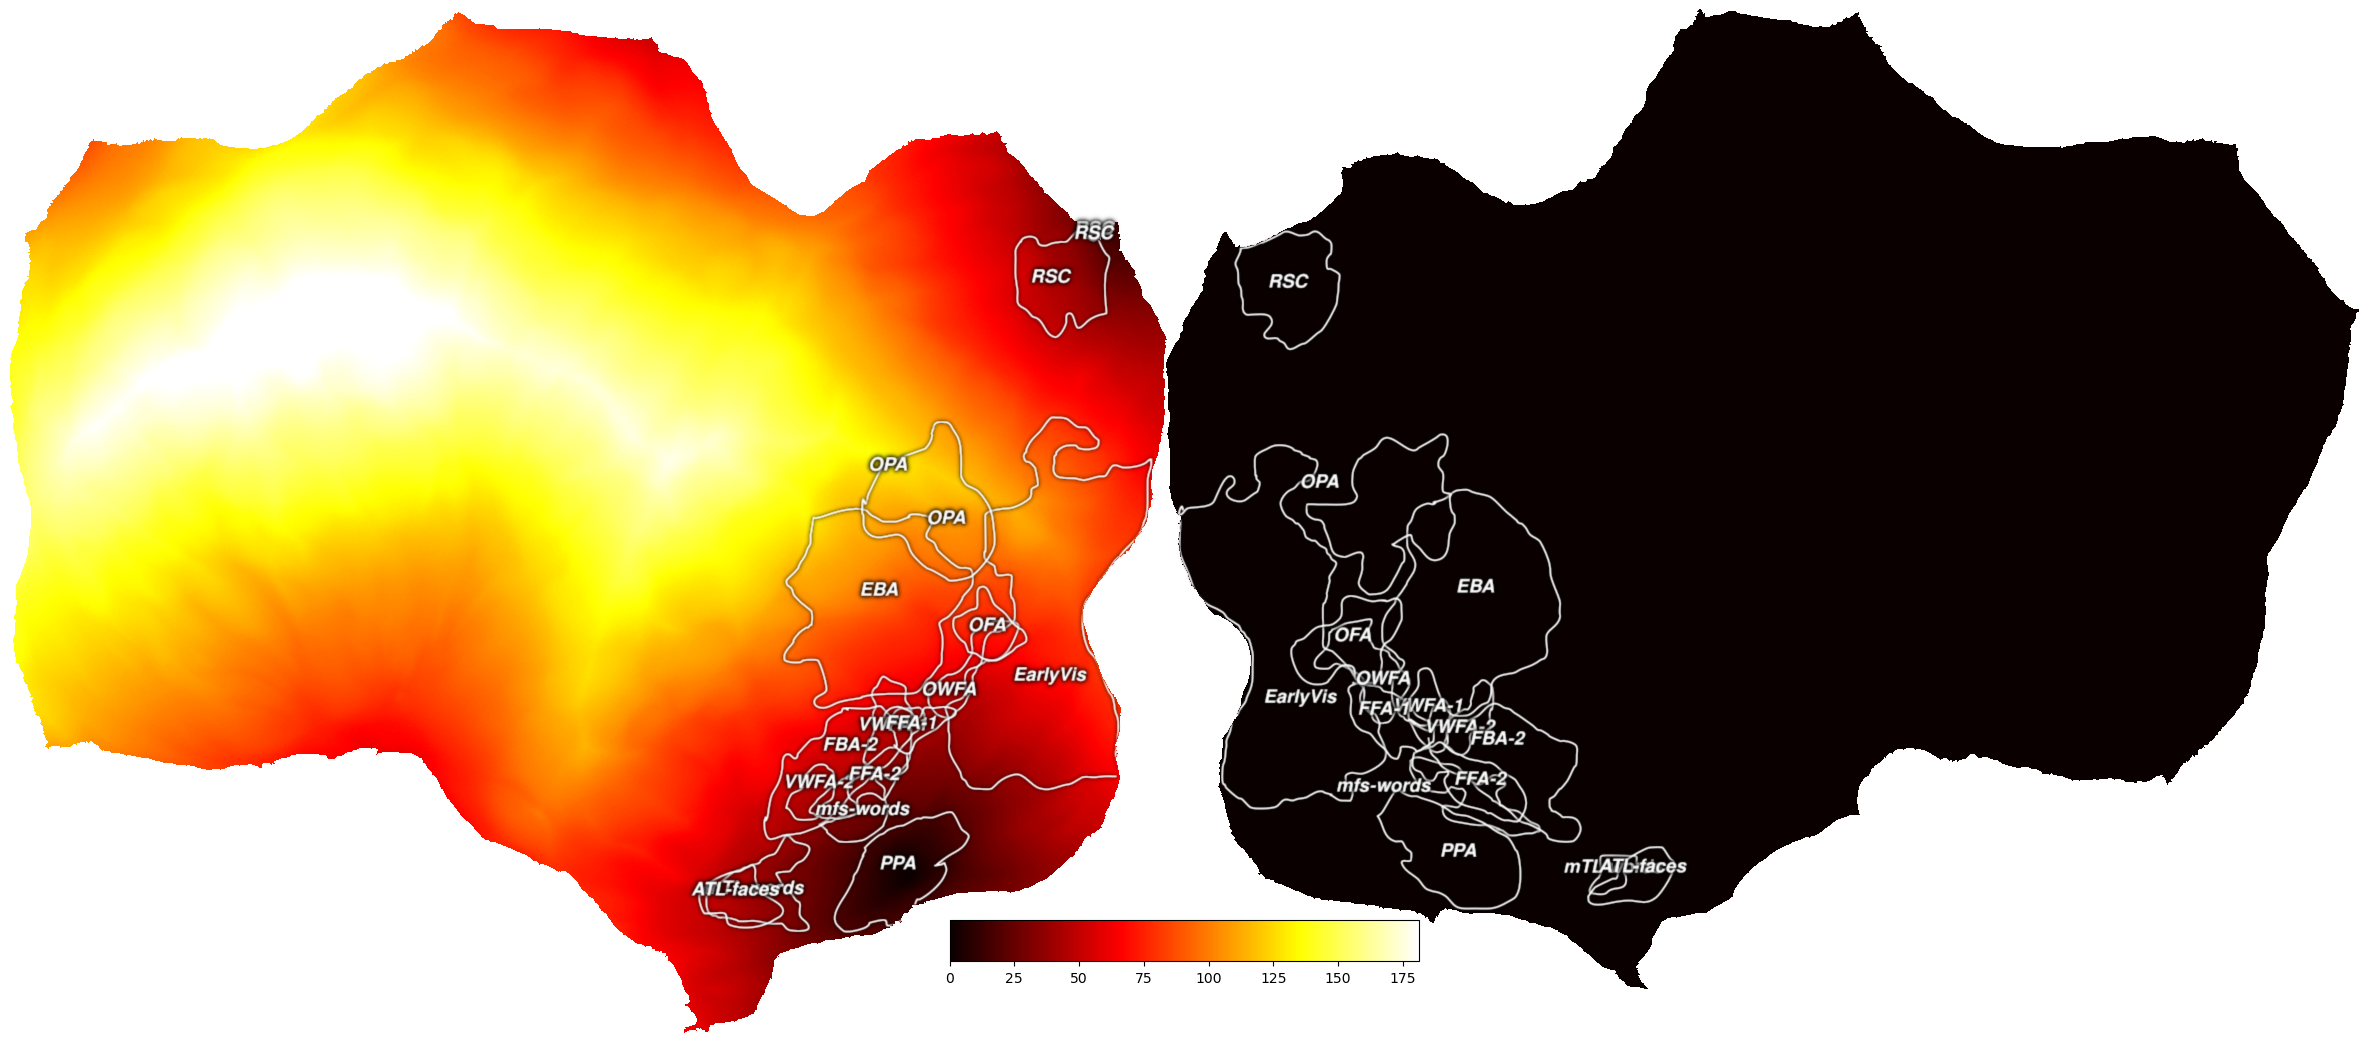

In [34]:
PPA_dists = left.geodesic_distance([PPA_frechet_mean_id_left])
dist_map = cortex.Vertex(PPA_dists, subject, cmap="hot")
cortex.quickshow(dist_map)
plt.show();

In [35]:
print(f"Geodesic distance between PPA and EBA is {PPA_dists[EBA_frechet_mean_id_left]}")

Geodesic distance between PPA and EBA is 82.50075677845354


Background RRGGBBAA: ffffff00
Area 0:0:2349.34:1024 exported to 2349 x 1024 pixels (96 dpi)


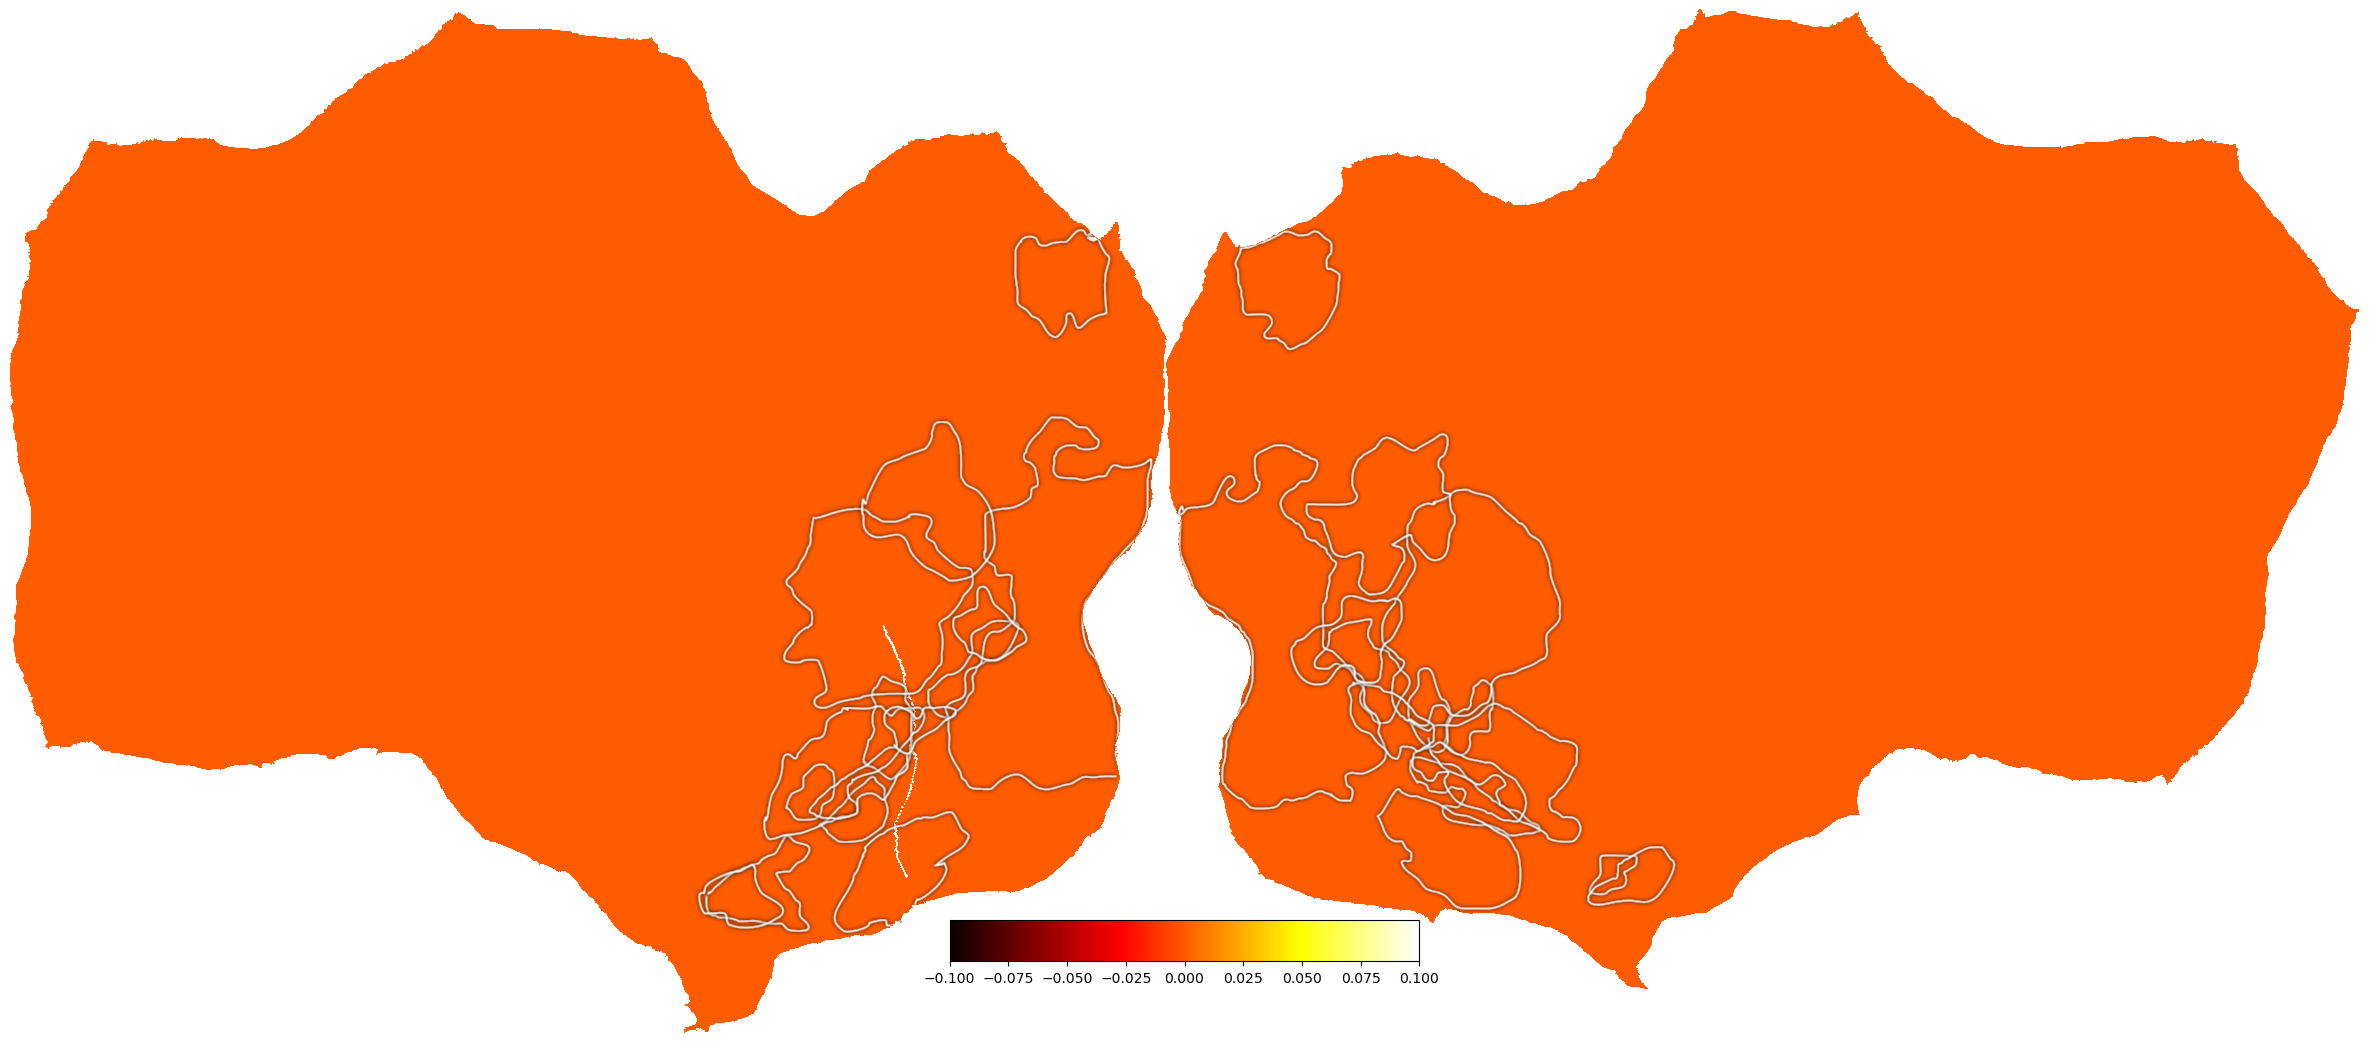

In [36]:
path = left.geodesic_path(PPA_frechet_mean_id_left, EBA_frechet_mean_id_left)
path_data = np.zeros(len(left.pts))
for v in path:
    path_data[v] = 1
EBA_PPA_path_map = cortex.Vertex(path_data, subject, cmap="hot")
cortex.quickshow(EBA_PPA_path_map, with_labels=False)
plt.show()

### FIX: Why is subj01 FFA-2 left surface empty????

In [75]:
vertex_mask = cortex.get_roi_verts("subj01", roi=otc_rois, mask=False)
num_verts = {roi: len(verts) for roi, verts in vertex_mask.items()}
print(num_verts)

{'FFA-1': 1639, 'FFA-2': 1534, 'OFA': 1636, 'EBA': 12407, 'FBA-1': 1451, 'FBA-2': 1865, 'OPA': 7324, 'PPA': 3891, 'VWFA-1': 3448, 'VWFA-2': 1996, 'OWFA': 1684}


In [78]:
roi = "FFA-2"

vertex_mask = cortex.get_roi_verts("subj01", roi=roi, mask=True)
left_roi_surface = left.create_subsurface(vertex_mask=vertex_mask[roi])
print(len(left_roi_surface.pts))

0


In [80]:
roi = "PPA"

vertex_mask = cortex.get_roi_verts("subj01", roi=roi, mask=True)
right_roi_surface = right.create_subsurface(vertex_mask=vertex_mask[roi])
left_roi_surface = left.create_subsurface(vertex_mask=vertex_mask[roi])
print(len(left_roi_surface.pts))
print(len(right_roi_surface.pts))
print(len(left_roi_surface.pts) + len(right_roi_surface.pts))

2150
790
2940


In [93]:
roi = "FFA-2"

vertex_mask = cortex.get_roi_verts("subj01", roi=roi, mask=True)
left_roi_surface = left.create_subsurface(vertex_mask=vertex_mask[roi])
frechet_mean_id = anatomy.compute_frechet_mean(left_roi_surface)
roi_pts_ids = cortex.get_roi_verts(subject, roi=roi)[roi]
FFA2_frechet_mean_id_left = anatomy._ids_from_roi_to_hemi(roi_pts_ids, frechet_mean_id)


viz.plot_roi_frechet_mean(subject, left, roi, FFA2_frechet_mean_id_left)

ValueError: attempt to get argmin of an empty sequence

### Compute all Fréchet means

In [8]:
frechet_means = anatomy.compute_all_frechet_means(subject, left, rois)

computing Frechet mean of FFA-2...


/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


done.
computing Frechet mean of EBA...
done.
computing Frechet mean of VWFA-2...
done.
computing Frechet mean of OFA...
done.
computing Frechet mean of OWFA...
done.
computing Frechet mean of VWFA-1...
done.
computing Frechet mean of FFA-1...
done.
computing Frechet mean of FBA-2...
done.
computing Frechet mean of OPA...
done.
computing Frechet mean of PPA...
done.


In [30]:
anatomical_pairwise_distances = anatomy.compute_cortex_pairwise_geodesic_dist(
    subject, rois, frechet_means
)

Parallelizing n(n-1)/2 = 45 distance calculations with 32 processes.


Computing distances on left cortex:   0%|          | 0/45.0 [00:00<?, ?it/s]/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
Computing distances on left cortex:  29%|██▉       | 13/45.0 [03:09<00:56,  1.75s/it]  /home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/cortex/polyutils/surface.py:552: RuntimeWarning: overflow encountered in multiply
  x1 = 0.5 * (c32 * X).sum(1)
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/cortex/polyutils/surface.py:553: RuntimeWarning: overflow encountered in multiply
  x2 = 0.5 * (c13 * X).sum(1)
/home/facosta/mi

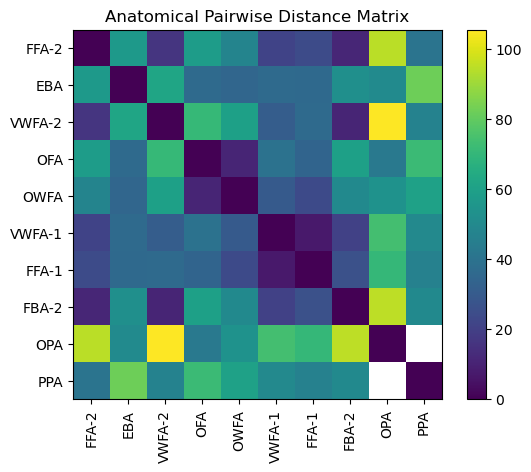

In [35]:
plt.imshow(anatomic_pairwise_distances)
plt.xticks(ticks=np.arange(len(rois)), labels=rois, rotation=90)
plt.yticks(ticks=np.arange(len(rois)), labels=rois)
plt.title(f"Anatomical Pairwise Distance Matrix")
cbar = plt.colorbar()

Why is this nan ?!?!?

In [40]:
anatomic_pairwise_distances[9, 8]

nan

Background RRGGBBAA: ffffff00
Area 0:0:2349.34:1024 exported to 2349 x 1024 pixels (96 dpi)


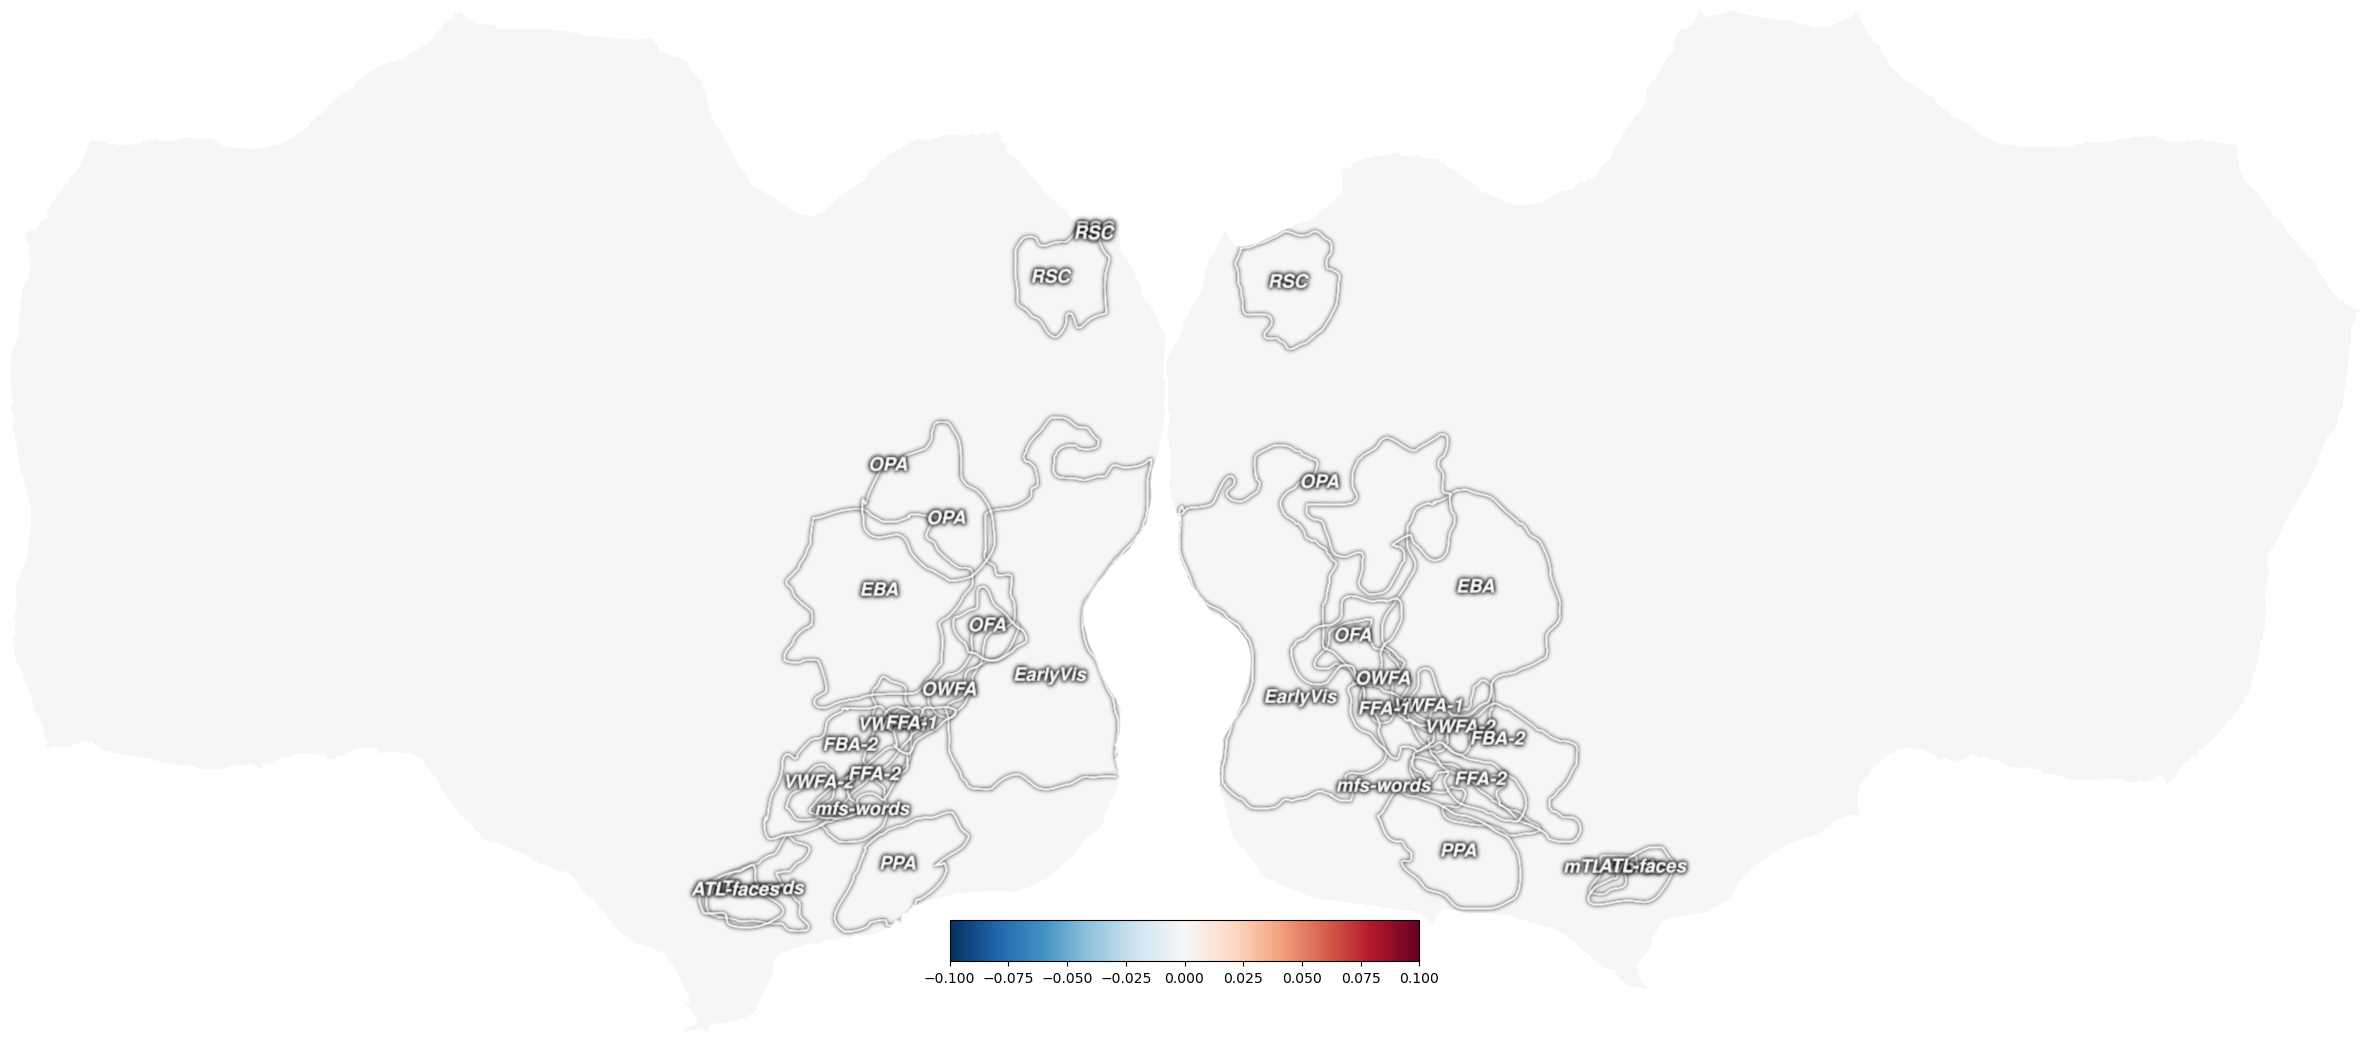

In [41]:
empty = cortex.Vertex.empty(subject)
cortex.quickshow(empty);

In [86]:
subject = "subj01"
roi = "FFA-2"

left_rois_vertices, right_rois_vertices = anatomy.get_roi_vertices(subject, otc_rois)

roi_pts_ids = left_rois_vertices[roi]
roi_pts = left.pts[roi_pts_ids]

# ROI polys in hemisphere indices
roi_polys = [
    face
    for face in left.polys
    if (face[0] in roi_pts_ids and face[1] in roi_pts_ids and face[2] in roi_pts_ids)
]

# ROI polys in ROI indices
roi_polys_in_roi = [
    (
        anatomy._ids_from_hemi_to_roi(roi_pts_ids, face[0]),
        anatomy._ids_from_hemi_to_roi(roi_pts_ids, face[1]),
        anatomy._ids_from_hemi_to_roi(roi_pts_ids, face[2]),
    )
    for face in roi_polys
]

roi_surface = cortex.utils.Surface(pts=roi_pts, polys=np.array(roi_polys_in_roi))

frechet_mean_id = anatomy.compute_frechet_mean(left_roi_surface)
roi_pts_ids = cortex.get_roi_verts(subject, roi=roi)[roi]
frechet_mean_id_left = anatomy._ids_from_roi_to_hemi(roi_pts_ids, frechet_mean_id)

anatomy.plot_roi_frechet_mean(subject, left, roi, frechet_mean_id_left)

IndexError: index 317736 is out of bounds for axis 0 with size 227021

## Representational Similarity Analysis (RSA) 

In [17]:
import neurometry.rep_metrics.dissimilarity as dissimilarity

Compute RDMs (pearson) for all $n$ networks and compute $\frac{1}{2}n(n-1)$ pairwise dissimilarities (1-pearson)

Parallelizing n(n-1)/2 = 153 distance calculations with 32 processes.


Computing distances: 100%|██████████| 153/153.0 [00:00<00:00, 209.90it/s]


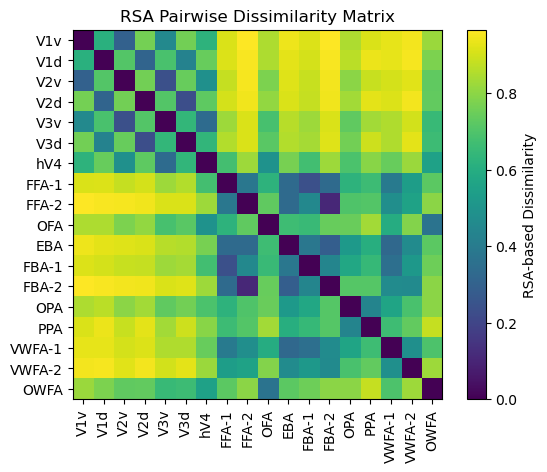

In [21]:
rsa_pairwise_dissimilarity_matrix = dissimilarity.compute_rsa_pairwise_dissimilarities(
    neural_data[1], "pearson", "pearson"
)

viz.plot_pairwise_dis_matrix(rsa_pairwise_dissimilarity_matrix, functional_rois, "RSA")

In [24]:
import itertools

rdm_compute_types = ["euclidean", "pearson", "spearman", "mahalanobis", "concordance"]
rdm_compare_types = ["pearson", "spearman", "concordance"]
rsa_types = list(itertools.product(rdm_compute_types, rdm_compare_types))

In [ ]:
rsa_geometry_matrices = {}

for rsa_type in rsa_types:
    for subjects in subject_ids:
        

Find high-dimensional Euclidean embedding for RSA space that preserves pairwise distances with Multidimensional Scaling (MDS):

In [19]:
from sklearn.manifold import MDS

mds_dimensions = 100

rsa_embedding = MDS(
    n_components=mds_dimensions,
    dissimilarity="precomputed",
    random_state=seed,
    normalized_stress=False,
)
rsa_mds_embedding = rsa_embedding.fit_transform(rsa_pairwise_dissimilarity_matrix)
print(f"RSA space MDS Stress = {rsa_embedding.stress_}")

RSA space MDS Stress = 0.05505033242282029


Project RSA space embeddings onto 2 principal components:

In [22]:
from neurometry.rep_metrics.dim_reduction import TorchPCA

rsa_pca = TorchPCA(n_components=2, device="cuda").fit(rsa_mds_embedding.T)
rsa_pca_mds_data = rsa_pca.get_top_n_components(n_components=2).cpu()
rsa_expl_var = rsa_pca.explained_variance_ratio_

print(f"PC1 explained variance = {100*rsa_expl_var[0]:.1f}%")
print(f"PC2 explained variance = {100*rsa_expl_var[1]:.1f}%")
print(f"Total 2D explained variance = {100*torch.sum(rsa_expl_var).item():.1f}%")

PC1 explained variance = 44.9%
PC2 explained variance = 14.4%
Total 2D explained variance = 59.2%


Visualize 2D projection:

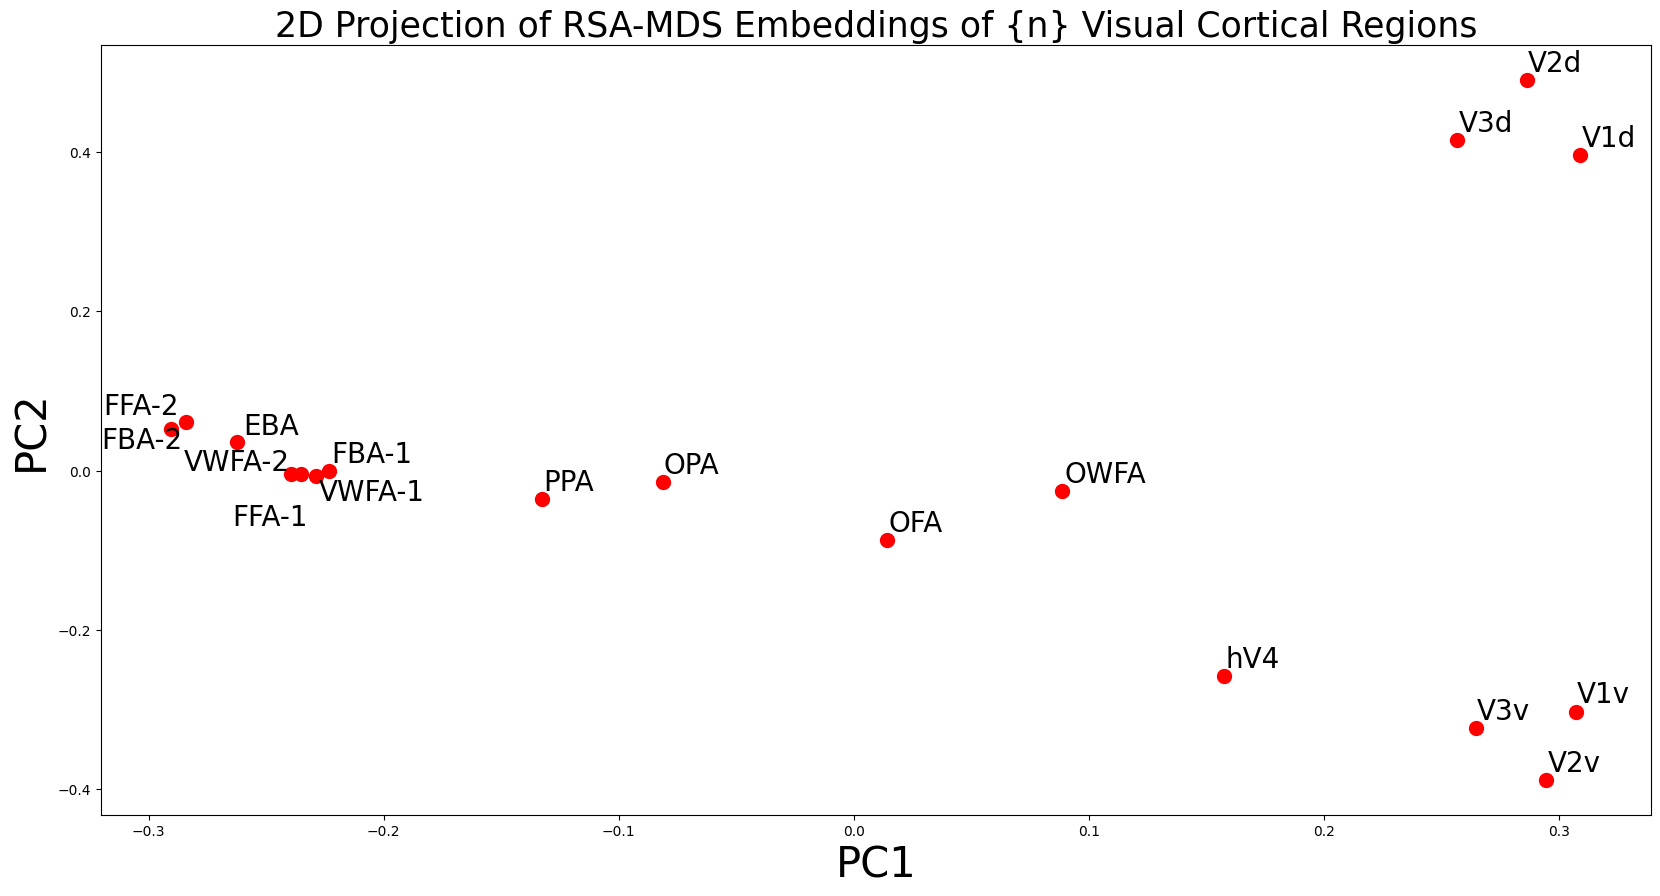

In [23]:
from adjustText import adjust_text

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()


texts = []
for idx, (x, y) in enumerate(rsa_pca_mds_data):
    ax.scatter(x, y, label=functional_rois[idx], s=100, c="red")
    texts.append(plt.text(x, y, functional_rois[idx], fontsize=20))

adjust_text(texts)

ax.set_xlabel("PC1", fontsize=30)
ax.set_ylabel("PC2", fontsize=30)
ax.set_title(
    "2D Projection of RSA-MDS Embeddings of {n} Visual Cortical Regions", fontsize=25
)
plt.show();

## Principal Component Analysis (PCA) of Voxel Responses

Plot PCA eigenspectrum for one region - e.g., Human V4

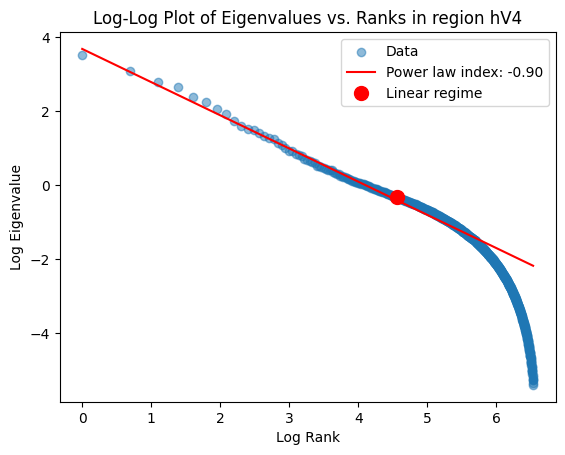

In [24]:
from neurometry.rep_metrics.dim_reduction import compute_power_law_index

region = "hV4"

slope, y_intercept, log_ranks, log_eigvals, knee_x, knee_y = compute_power_law_index(
    neural_data[region].to_numpy()
)

import viz

viz.plot_pca_spectrum(
    region, slope, y_intercept, log_ranks, log_eigvals, knee_x, knee_y
)

### Quantify geometric distortion introduced by PCA projection 

Plot cumulative variance explained ratio vs principal component dimensions

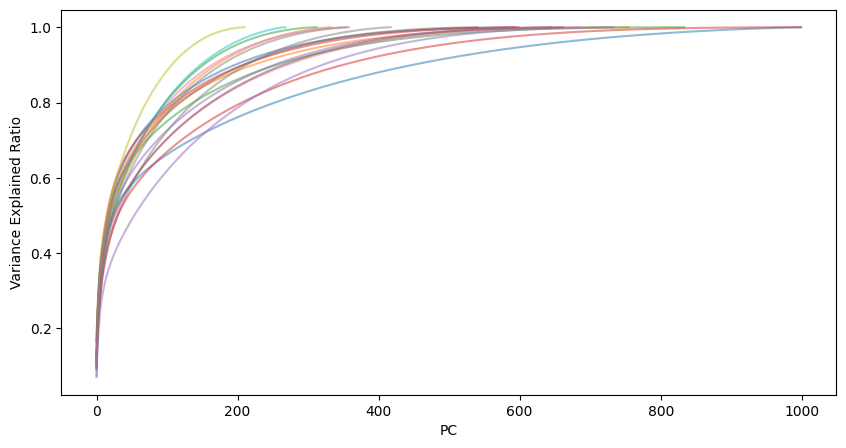

In [25]:
fig = plt.figure(figsize=(10, 5))
neural_data_region_pcas = {}
for region in functional_rois:
    pca = TorchPCA(device="cuda").fit(neural_data[region].to_numpy())
    neural_data_region_pcas[region] = pca
    plt.plot(pca.cumulative_explained_variance_ratio_.cpu(), alpha=0.5)
    plt.xlabel("PC")
    plt.ylabel("Variance Explained Ratio")

Analyze within-region pairwise-distance preservation

In [26]:
neural_data_list = [neural_data[region].to_numpy().T for region in neural_data.keys()]

In [28]:
from neurometry.rep_metrics.dim_reduction import compute_distance_preservation

corrs, stresses, all_us = compute_distance_preservation(neural_data_list)

100%|██████████| 211/211 [00:13<00:00, 15.99it/s]


correlation >= 0.95 at dim 5
stress <= 0.15 not attainable


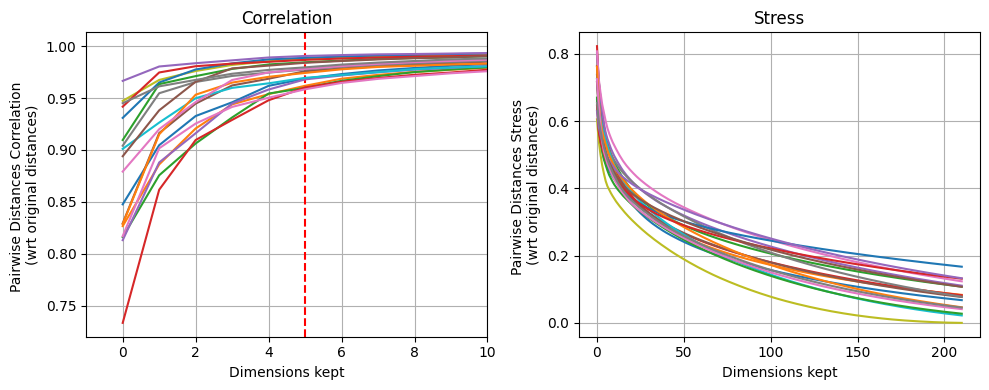

In [29]:
from neurometry.rep_metrics.dim_reduction import get_minimal_embedding

corr_reduced_neural_data, stress_reduced_neural_data = get_minimal_embedding(
    corrs, stresses, all_us, plot=True, corr_threshold=0.95, stress_threshold=0.15
)

viz.plot_pca_distortions(
    corrs, stresses, corrs_dim=corr_reduced_neural_data[0].shape[1]
)

### Perform PCA reduction with fixed n_components for all regions

In [30]:
n_components = 211

pca_reduced_neural_data = {}

for region in functional_rois:
    X = (
        neural_data_region_pcas[region]
        .get_top_n_components(n_components=n_components)
        .T
    )
    pca_reduced_neural_data[region] = pd.DataFrame(
        X.cpu(), columns=neural_data[region].columns
    )

## Generalized Shape Metrics

### Initialize metric

We choose a metric from a family of linear metrics parameterized by $\alpha \in [0,1]$, where

$\alpha = 0$ corresponds to [Canonical Correlation Analysis (CCA)](https://en.wikipedia.org/wiki/Canonical_correlation)

$\alpha = 1$ corresponds to [Procrustes distance](https://en.wikipedia.org/wiki/Procrustes_analysis)

### Compute region-region pairwise distance matrix

We have n = 18 cortical regions;
We need n(n-1)/2 = 153 distance calculations
Parallelizing 153 distance calculations with 32 processes.


Computing distances: 100%|██████████| 153/153 [00:11<00:00, 13.80it/s]


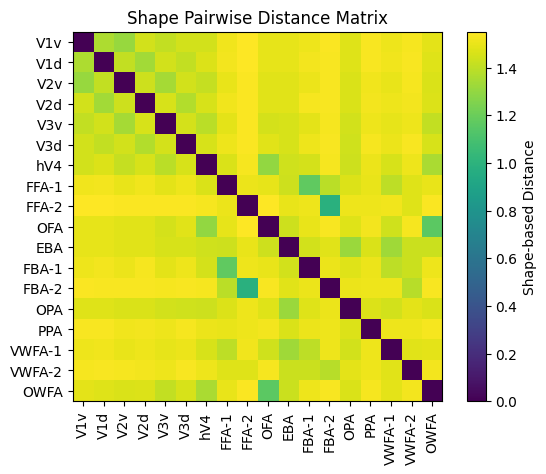

In [33]:
alpha = 1  # Procrustes

shape_pairwise_distance_matrix = dissimilarity.compute_pairwise_distances(
    pca_reduced_neural_data, benchmark.stimulus_data, alpha=alpha
)
viz.plot_pairwise_dis_matrix(dissimilarity.pairwise_distance_matrix, functional_rois, method="Shape")

### MDS + PCA embedding trick

Find high-dimensional Euclidean embedding that preserves pairwise distances with Multidimensional Scaling (MDS):

In [34]:
from sklearn.manifold import MDS

mds_dimensions = 100


shape_embedding = MDS(
    n_components=mds_dimensions,
    dissimilarity="precomputed",
    random_state=seed,
    normalized_stress=False,
)
shape_mds_embedding = shape_embedding.fit_transform(pairwise_distance_matrix)

print(f"Shape Space MDS Stress = {shape_embedding.stress_}")

Shape Space MDS Stress = 0.11314267535991743


Project Shape space embeddings onto 2 principal components:

In [35]:
shape_pca = TorchPCA(n_components=2, device="cuda").fit(shape_mds_embedding.T)
shape_pca_mds_data = shape_pca.get_top_n_components(n_components=2).cpu()
shape_expl_var = shape_pca.explained_variance_ratio_

print(f"PC1 explained variance = {100*shape_expl_var[0]:.1f}%")
print(f"PC2 explained variance = {100*shape_expl_var[1]:.1f}%")
print(f"Total 2D explained variance = {100*torch.sum(shape_expl_var).item():.1f}%")

PC1 explained variance = 10.6%
PC2 explained variance = 8.8%
Total 2D explained variance = 19.4%


Visualize 2D projection:

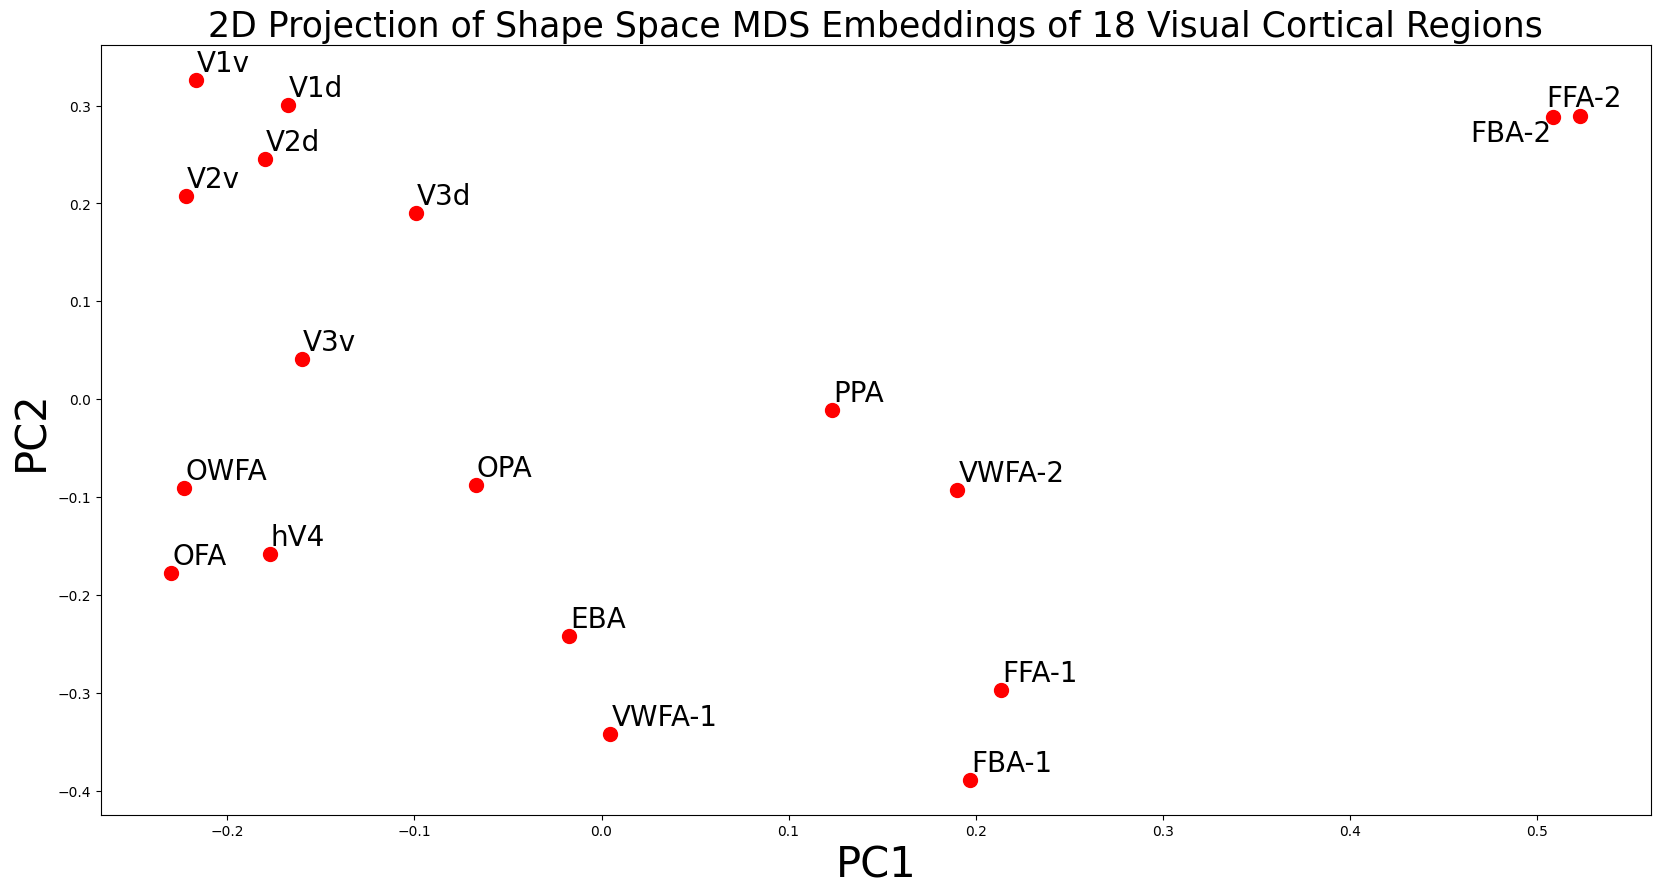

In [36]:
from adjustText import adjust_text

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()


texts = []
for idx, (x, y) in enumerate(shape_pca_mds_data):
    ax.scatter(x, y, label=functional_rois[idx], s=100, c="red")
    texts.append(plt.text(x, y, functional_rois[idx], fontsize=20))

adjust_text(texts)

ax.set_xlabel("PC1", fontsize=30)
ax.set_ylabel("PC2", fontsize=30)
ax.set_title(
    f"2D Projection of Shape Space MDS Embeddings of {len(texts)} Visual Cortical Regions",
    fontsize=25,
)
plt.show();

## Centered Kernel Alignment (CKA)

## Evaluate different methods

Compute stress between anatomical distance matrix and representational distance matrix for each method:

In [42]:
from neurometry.rep_metrics.dim_reduction import _compute_stress